# Image Generator with Validation

In [20]:
# Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2024-04-18 05:05:35--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.250.141.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip.1’

horse-or-human.zip. 100%[===================>] 142.65M   163MB/s    in 0.9s    

2024-04-18 05:05:36 (163 MB/s) - ‘horse-or-human.zip.1’ saved [149574867/149574867]



In [21]:
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2024-04-18 05:05:36--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.250.141.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip.1’

validation-horse-or 100%[===================>]  10.95M  --.-KB/s    in 0.09s   

2024-04-18 05:05:36 (127 MB/s) - ‘validation-horse-or-human.zip.1’ saved [11480187/11480187]



In [22]:
import zipfile

# Unzip training set
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

# Unzip validation set
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

Define the directories containing the image

In [23]:
import os

# Directory with training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [24]:
train_horse_names = os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS: {train_human_names[:10]}')

validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

TRAIN SET HORSES: ['horse49-8.png', 'horse30-3.png', 'horse26-4.png', 'horse49-4.png', 'horse09-2.png', 'horse44-9.png', 'horse02-9.png', 'horse36-5.png', 'horse05-1.png', 'horse16-4.png']
TRAIN SET HUMANS: ['human01-06.png', 'human03-23.png', 'human12-03.png', 'human11-24.png', 'human07-24.png', 'human16-03.png', 'human17-21.png', 'human08-17.png', 'human13-29.png', 'human12-11.png']
VAL SET HORSES: ['horse5-203.png', 'horse1-204.png', 'horse3-469.png', 'horse4-403.png', 'horse2-441.png', 'horse1-122.png', 'horse1-276.png', 'horse5-018.png', 'horse3-521.png', 'horse5-589.png']
VAL SET HUMANS: ['valhuman01-14.png', 'valhuman02-01.png', 'valhuman01-15.png', 'valhuman02-17.png', 'valhuman02-10.png', 'valhuman03-04.png', 'valhuman03-03.png', 'valhuman05-06.png', 'valhuman05-14.png', 'valhuman04-09.png']


In [25]:
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [26]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

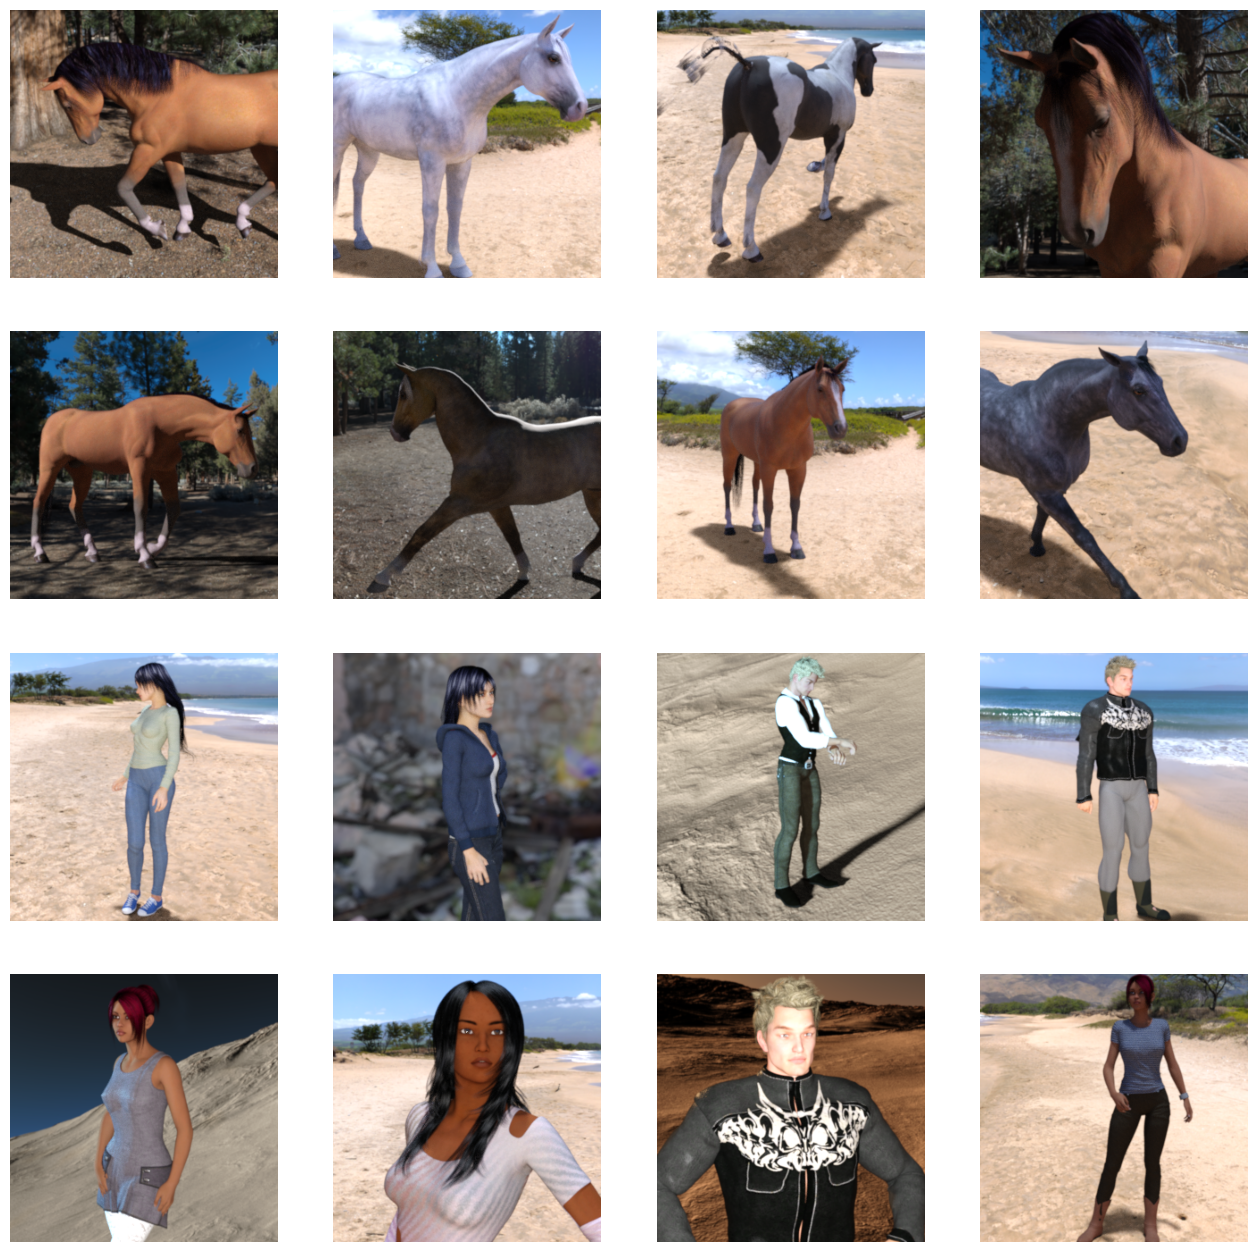

In [27]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


## Building a Small Model from Scratch

In [28]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 149, 149, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 35, 35, 64)       

Compile settings

In [30]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

### Data Preprocessing

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for validation images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## Training

In [32]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 12s 1s/step - loss: 0.6984 - accuracy: 0.5595 - val_loss: 0.6818 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 11s 1s/step - loss: 0.6822 - accuracy: 0.5695 - val_loss: 0.7841 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 10s 1s/step - loss: 0.9173 - accuracy: 0.6396 - val_loss: 0.6461 - val_accuracy: 0.5195
Epoch 4/15
8/8 [==============================] - 10s 1s/step - loss: 0.5063 - accuracy: 0.7375 - val_loss: 0.4432 - val_accuracy: 0.8242
Epoch 5/15
8/8 [==============================] - 10s 1s/step - loss: 0.3077 - accuracy: 0.8954 - val_loss: 1.3893 - val_accuracy: 0.7773
Epoch 6/15
8/8 [==============================] - 10s 1s/step - loss: 0.2165 - accuracy: 0.9155 - val_loss: 1.6920 - val_accuracy: 0.7461
Epoch 7/15
8/8 [==============================] - 10s 1s/step - loss: 0.4079 - accuracy: 0.8765 - val_loss: 0.8303 - val_accuracy: 0.8398
Epoch 8/15
8/8 [==================

In [33]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")


Saving human_3.jpg to human_3.jpg
Saving human_2.jpg to human_2.jpg
Saving human_1.jpg to human_1.jpg
Saving horse_3.jpg to horse_3.jpg
Saving horse_2.jpg to horse_2.jpg
Saving horse_1.jpg to horse_1.jpg
1/1 [==============================] - 0s 428ms/step
[0.99251735]
human_3.jpg is a human
1/1 [==============================] - 0s 18ms/step
[6.583767e-08]
human_2.jpg is a horse
1/1 [==============================] - 0s 17ms/step
[0.9992611]
human_1.jpg is a human
1/1 [==============================] - 0s 23ms/step
[0.29137594]
horse_3.jpg is a horse
1/1 [==============================] - 0s 19ms/step
[0.00072393]
horse_2.jpg is a horse
1/1 [==============================] - 0s 18ms/step
[0.39905876]
horse_1.jpg is a horse
